# handling missing numerical values (univariate:-mean and median)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [182]:
from sklearn.model_selection  import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [183]:
df = pd.read_csv("titanic_toy.csv")
df.sample(5)

,Age,Fare,Family,Survived
678,43.0,46.9000,7,0
510,29.0,7.7500,0,1
160,44.0,16.1000,1,0
313,28.0,7.8958,0,0
79,30.0,12.4750,0,1


In [184]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [185]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [186]:
age_mean = X_train['Age'].mean()
age_median = X_train['Age'].median()
fare_mean = X_train['Fare'].mean()
fare_median = X_train['Fare'].median()

In [187]:
X_train['age_mean'] =X_train['Age'].fillna(age_mean)
X_train['age_median'] =X_train['Age'].fillna(age_median)
X_train['fare_mean'] =X_train['Age'].fillna(fare_mean)
X_train['fare_median'] =X_train['Age'].fillna(fare_median)

In [188]:
X_train

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
30,40.0,27.7208,0,40.000000,40.00,40.000000,40.0000
10,4.0,16.7000,2,4.000000,4.00,4.000000,4.0000
873,47.0,9.0000,0,47.000000,47.00,47.000000,47.0000
182,9.0,31.3875,6,9.000000,9.00,9.000000,9.0000
876,20.0,9.8458,0,20.000000,20.00,20.000000,20.0000
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,30.000000,30.0000
584,NaN,8.7125,0,29.785904,28.75,32.617597,14.4583
493,71.0,49.5042,0,71.000000,71.00,71.000000,71.0000
527,NaN,221.7792,0,29.785904,28.75,32.617597,14.4583


In [189]:
#isko use nahi krna as it has more disadvantages ?
# same can be done using sklearn ki simple imputer 

# multivariate data 
# knn 

In [190]:
data = pd.read_csv("train.csv")[['Age' , 'Pclass' ,'Fare' , 'Survived']]
data.sample(5)

,Age,Pclass,Fare,Survived
38,18.0,3,18.0000,0
94,59.0,3,7.2500,0
281,28.0,3,7.8542,0
611,NaN,3,7.0500,0
366,60.0,1,75.2500,1


In [191]:
data.isnull().mean()*100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [192]:
x = data.drop(columns=['Survived'])
y = data['Survived']

In [193]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,test_size=0.2,random_state=2)
X1_train.shape, X1_test.shape

((712, 3), (179, 3))

In [194]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=10)

In [195]:
x1_train_trnf = knn.fit_transform(X1_train)
x1_test_trnf = knn.transform(X1_test)

In [196]:
pd.DataFrame(x1_train_trnf , columns=X1_train.columns)

,Age,Fare,Family
0,40.0,27.7208,0.0
1,4.0,16.7000,2.0
2,47.0,9.0000,0.0
3,9.0,31.3875,6.0
4,20.0,9.8458,0.0
...,...,...,...
707,30.0,8.6625,0.0
708,29.4,8.7125,0.0
709,71.0,49.5042,0.0
710,28.7,221.7792,0.0


In [197]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x1_train_trnf , y1_train)
y_pred = lr.predict(x1_test_trnf)
from sklearn.metrics import accuracy_score
accuracy_score( y1_test , y_pred)

0.6145251396648045

# outliers detection 
normalization detection

In [198]:
data1 = pd.read_csv("placement.csv")
data1

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [199]:
data1 = data1.drop(columns=['Unnamed: 0'])

C:\Users\anshu\AppData\Local\Temp\ipykernel_7012\3073891864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data1['cgpa'])
c:\Users\anshu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cgpa', ylabel='Density'>

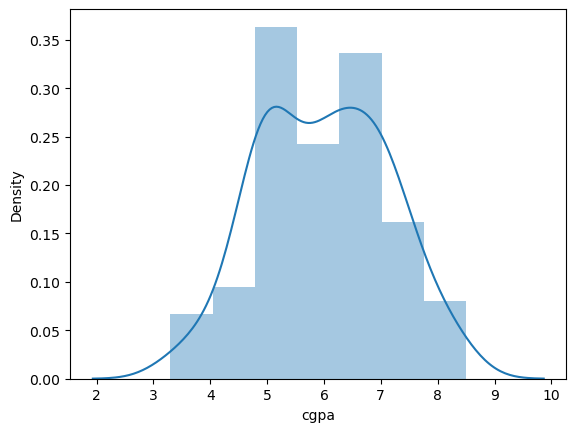

In [200]:
import seaborn as sb
sb.distplot(data1['cgpa']) 

C:\Users\anshu\AppData\Local\Temp\ipykernel_7012\1028091169.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data1['iq'])
c:\Users\anshu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='iq', ylabel='Density'>

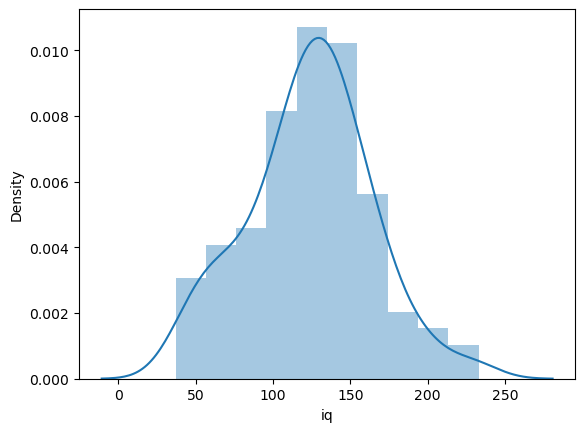

In [201]:
sb.distplot(data1['iq'])

In [202]:
mean_iq = data1['cgpa'].mean()
std_iq = data1['cgpa'].std()
mean_iq , std_iq


(5.9910000000000005, 1.1436336737775692)

In [203]:
max_outlier_iq = (mean_iq+3*std_iq)
min_outlier_iq = (mean_iq-3*std_iq)
max_outlier_iq , min_outlier_iq

(9.421901021332708, 2.560098978667293)

In [204]:
data1[(data1['cgpa']>243.412) | (data1['cgpa']<3.74)]

,cgpa,iq,placement
17,3.3,183.0,0
50,3.5,233.0,0


In [205]:
#0 outliers 

In [206]:
new_data1 = data1[(data1['cgpa']<243.412) & (data1['cgpa']>3.74)]
new_data1

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [207]:
#capping 

In [208]:
data1['cgpa'] = np.where(
    data1['cgpa'] > max_outlier_iq , 
    max_outlier_iq,
    np.where(
        data1['cgpa'] <min_outlier_iq , 
        min_outlier_iq , 
        data1['cgpa']
    )

)

In [211]:
data1['cgpa'].describe()

count    100.000000
mean       5.991000
std        1.143634
min        3.300000
25%        5.075000
50%        6.000000
75%        6.900000
max        8.500000
Name: cgpa, dtype: float64